In [1]:
import os
os.chdir(((os.sep).join((os.getcwd().split(os.sep))[:-1]))) 
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numerical_methods.numerical_methods import EulerMethod
warnings.filterwarnings("ignore") # Игнорируем предупреждения
%matplotlib inline

Протестируем метод Эйлера на дифференциальном уравнении первого порядка $yy' - x = 0$.
1. Изобразим решение графически. Оценим погрешность.
2. Вычислим погрешность решения по сравнению с точным при уменьшающемся шаге сетки по равномерной (Чебышёвской) норме. 
3. Изобразим ответ как функцию от размера шага сетки в логарифмической шкале.

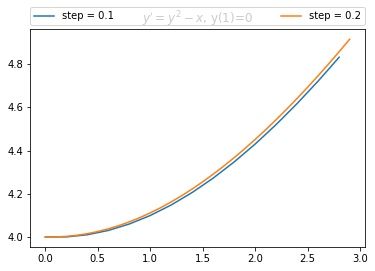

Error:  0.025622249726


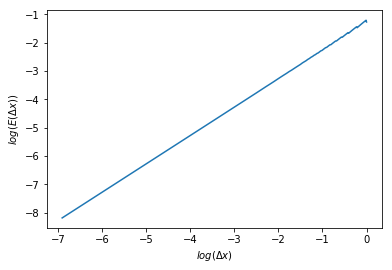

In [2]:
# дифференицальное уравнение
def diff_foo(x, y): 
    return x/y

# аналитическое решение
def analytic_foo(x):
    return np.sqrt(x**2 + 16)

# настройка уравнения Эйлера для дифференциального уравнения первого порядка
md = EulerMethod(foo=diff_foo, order=1, n_eq=1)

# Оценка погрешности с помощью правила Рунге

p = 1 # порядок метода

# сетка с шагом d
md.fit(x0=0, y0=4, ey0=None, xf=3, n=None, d=0.1)
y2, x2 = md.predict()

# сетка с шагом d/2
md.fit(x0=0, y0=4, ey0=None, xf=3, n=None, d=0.2)
y1, x1 = md.predict()

# рисуем функцию для двух разных сеток
plt.plot(x1, y1, label="step = 0.1")
plt.plot(x2, y2, label="step = 0.2")
plt.title(r"$y'=y^2-x$, y(1)=0")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()

# считаем ошибку согласно правилу Рунге
ans = np.array([])
for i in range(len(y1)):
    ans = np.append(ans, abs(y1[i] - y2[i*2]))
print("Error: ", ans.max())

# Вычислим погрешность решения по сравнению с точным при уменьшающемся шаге сетки по равномерной (Чебышёвской) норме
steps = np.linspace(0.001, 1, 100)[::-1]
ans = np.array([])
for i in steps:
    x = np.arange(0, 4, i)
    y = analytic_foo(x)
    md.fit(x0=0, y0=4, ey0=None, xf=4, n=None, d=i)
    yp, xp = md.predict()    
    ans = np.append(ans, abs(y - yp).max()) 

# Изобразим ответ как функцию от размера шага сетки в логарифмической шкале
plt.plot(np.log(steps), np.log(ans))
plt.xlabel(r'$log(\Delta x)$')
plt.ylabel(r'$log(E(\Delta x))$')
plt.show()

Протестируем метод Эйлера на дифференциальном уравнении второго поядка $y'' - 10y' + 25y = e^{2x}$.
1. Вычислим погрешность решения по сравнению с точным при уменьшающемся шаге сетки по равномерной (Чебышёвской) норме. 
2. Изобразим ответ как функцию от размера шага сетки в логарифмической шкале.

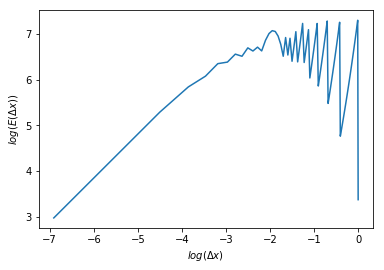

In [3]:
def diff_foo(x, y, dy):
    return 6 * dy - 9 * y + pow(np.e, 3 * x)

def analytic_foo(x):
    return x * pow(np.e, 3 * x) + 0.5 * pow(x, 2) * pow(np.e, 3 * x)

md = EulerMethod(foo=diff_foo, order=2)

steps = np.linspace(0.001, 1, 100)[::-1]
ans = np.array([])
for i in steps:
    x = np.arange(0, 2, i)
    y = analytic_foo(x)
    md.fit(x0=0, y0=0, ey0=1, xf=2, n=None, d=i)
    yp, dyp, xp = md.predict()    
    ans = np.append(ans, abs(y - yp).max())

plt.plot(np.log(steps), np.log(ans))
plt.xlabel(r'$log(\Delta x)$')
plt.ylabel(r'$log(E(\Delta x))$')
plt.show()

Для системы дифференциальных уравнений:

$\left\{\begin{matrix}
y'_1=y_1+5y_2\\y'_2=-y_1-3y_2 
\end{matrix}\right.$

с начальными данными

$y_1(0)=-2$ и $y_2(0)=1$ 

существует решение: 

$y_1(x)=e^{-x}(\sin x - 2 \cos x)$ и $y_2(x)=e^{-x}\cos x$.

Покажем, что по теоремме о существования и единственности решения задачи Коши, численный метод будет давать решение, соответствующее аналитическому. 
Для этого: 
1. Изобразим решение графически. Оценим погрешность.
2. Нарисуем фазовый портрет для двух уравнений. 
3. Вычислим погрешность решения по сравнению с точным при уменьшающемся шаге сетки по равномерной норме. 

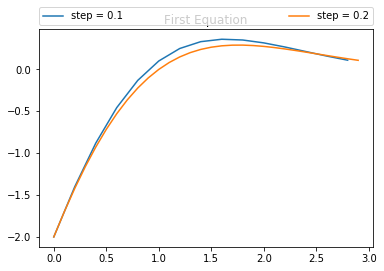

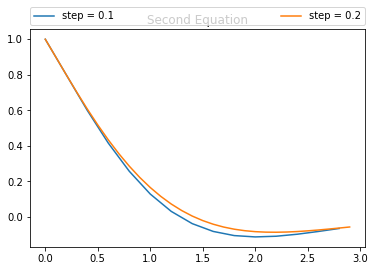

Error:  0.1006379232
Error:  0.0426053587456


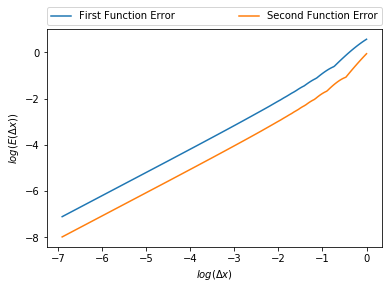

In [15]:
# дифференицальное уравнение
def diff_foo(x, y, y1): 
    return y + 5*y1

def diff1_foo(x, y, y1): 
    return -y - 3*y1

# Aналитическое решение
def analytic_foo(x):
    return pow(np.e, -x) * (np.sin(x) - 2*np.cos(x)) 

def analytic1_foo(x):
    return pow(np.e, -x) * np.cos(x)

# настройка уравнения Эйлера для дифференциального уравнения первого порядка
md = EulerMethod(foo=diff_foo, foo1 = diff1_foo, order=1, n_eq=2)

# Оценка погрешности с помощью правила Рунге

p = 1 # порядок метода

# сетка с шагом d
md.fit(x0=0, y0=-2, ey0=1, xf=3, n=None, d=0.1)
y2, ye2, x2 = md.predict()

# сетка с шагом d/2
md.fit(x0=0, y0=-2, ey0=1, xf=3, n=None, d=0.2)
y1, ye1, x1 = md.predict()

# рисуем функцию для двух разных сеток
plt.plot(x1, y1, label="step = 0.1")
plt.plot(x2, y2, label="step = 0.2")
plt.title("First Equation")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()

plt.plot(x1, ye1, label="step = 0.1")
plt.plot(x2, ye2, label="step = 0.2")
plt.title("Second Equation")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.show()

# считаем ошибку согласно правилу Рунге
ans = np.array([])
for i in range(len(y1)):
    ans = np.append(ans, abs(y1[i] - y2[i*2]))
print("Error: ", ans.max())

ans = np.array([])
for i in range(len(y1)):
    ans = np.append(ans, abs(ye1[i] - ye2[i*2]))
print("Error: ", ans.max())

# Вычислим погрешность решения по сравнению с точным при уменьшающемся шаге сетки по равномерной (Чебышёвской) норме
steps = np.linspace(0.001, 1, 100)[::-1]
ans = np.array([])
ans1 = np.array([])
for i in steps:
    x = np.arange(0, 3, i)
    y = analytic_foo(x)
    y1 = analytic1_foo(x)
    md.fit(x0=0, y0=-2, ey0=1, xf=3, n=None, d=i)
    yp, yep, xp = md.predict()    
    ans = np.append(ans, abs(y - yp).max()) 
    ans1 = np.append(ans1, abs(y1 - yep).max()) 

# Изобразим ответ как функцию от размера шага сетки в логарифмической шкале
plt.plot(np.log(steps), np.log(ans), label='First Function Error')
plt.plot(np.log(steps), np.log(ans1), label='Second Function Error')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel(r'$log(\Delta x)$')
plt.ylabel(r'$log(E(\Delta x))$')
plt.show()

Set #0: y0 =  -2 y1 =  -4
Set #1: y0 =  -3 y1 =  -1
Set #2: y0 =  3 y1 =  1
Set #3: y0 =  -1 y1 =  -5
Set #4: y0 =  4 y1 =  2


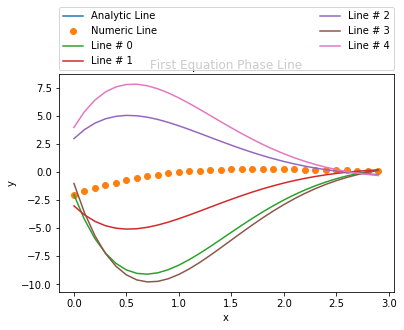

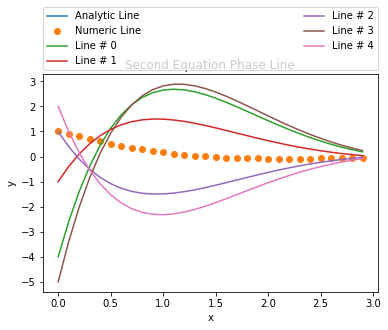

In [32]:
import random
y0s = []
y1s = []

for i in range(5):
    y0 = random.randint(-5, 5)
    y1 = random.randint(-5, 5)
    print("Set #{}:".format(i), "y0 = ", y0, "y1 = ", y1)
    md.fit(x0=0, y0=y0, ey0=y1, xf=3, n=None, d=0.1)
    yp, yep, xp = md.predict()    
    y0s.append(yp)
    y1s.append(yep)

x = np.arange(0, 3, i)
y = analytic_foo(x)
plt.plot(x, y, label='Analytic Line')
md.fit(x0=0, y0=-2, ey0=1, xf=3, n=None, d=0.1)
yp, yep, xp = md.predict()
plt.plot(xp, yp, 'o', label='Numeric Line')
for i in range(len(y0s)):
    plt.plot(xp, y0s[i], label='Line # {}'.format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.title("First Equation Phase Line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

x = np.arange(0, 3, i)
y = analytic1_foo(x)
plt.plot(x, y, label='Analytic Line')
md.fit(x0=0, y0=-2, ey0=1, xf=3, n=None, d=0.1)
yp, yep, xp = md.predict()
plt.plot(xp, yep, 'o', label='Numeric Line')
for i in range(len(y1s)):
    plt.plot(xp, y1s[i], label='Line # {}'.format(i))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.title("Second Equation Phase Line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [20]:
np.arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])